In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x160678250>

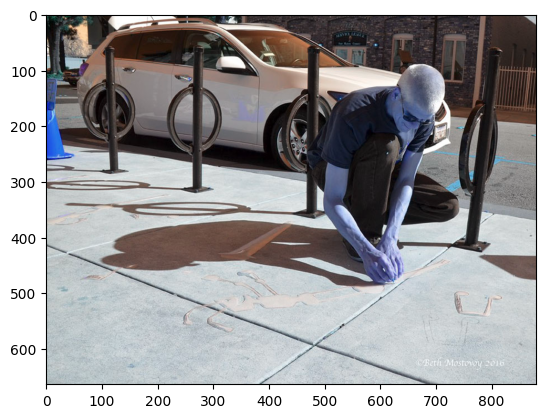

In [8]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [9]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [10]:
print(ClassIndex)

[1 3]


In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)  # Draw rectangle around detected object
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)


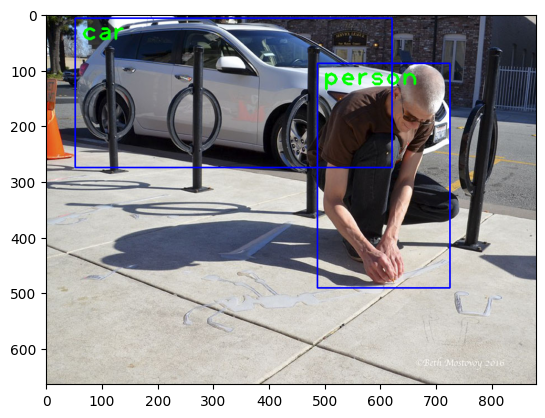

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#VIDEO

In [14]:

cap = cv2.VideoCapture('pexels-geoge-morina-5330833.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    # Check if the frame was successfully read
    if not ret:
        break
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    # Debugging: print ClassIndex values
    print(ClassIndex)
    
    if ClassIndex is not None and len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            # Ensure ClassInd is valid and within range
            if 1 <= ClassInd <= len(classLabels):
                # Draw rectangle and put text on the frame
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)  # Draw rectangle around detected object
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    
    cv2.imshow('Object Detection in Images', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[ 6  1  1  1  1  1  1 10  1]
[ 6  1  1  1  1  1 10]
[ 6  1  1  1  1  1  3 10]
[ 6  1  1  1  1  1 10]
[ 6  1  1  1  3  1  1 10]
[ 6  1  1  3  1  1 10  1]
[ 6  1  1  3  1  1  1 10  1]
[ 6  1  1  3  1  1  1 10  1  1]
[ 6  1  1  3  1  1 10  1  1  6]
[ 6  1  1  3  1  1 10  1]
[ 6  1  1  3  1 10  1  1  1]
[ 6  1  1  3  1 10  6  1]
[ 6  1  1  3  1  6  1 10  1  1]
[ 6  1  1  1  3  1  1  6 10  1]
[ 6  1  1  1  3 10  1  6]
[ 6  1  1  1  3  1 10  1  1  6  1]
[ 6  1  1  1  3  1  1 10  1  6]
[ 6  1  1  3  1  1 10  1  1  6]
[ 6  1  1  3  1 10  1  8  6  1  1]
[ 6  1  1  1  3 10  6  1  8  1  1]
[ 6  1  1  1  3 10  1  8  6]
[ 6  1  1  1  3 10  6  1  8]
[ 6  1  1  1  3 10  1]
[ 6  1  1  1  3 10  1]
[ 6  1  1  1  3 10  1  8]
[ 6  1  1  3  1 10]
[ 6  1  3  1  1 10  1]
[ 6  1  1  1  3 10  1  6  1 10]
[ 6  1  1  3  1  1  1 10  1]
[ 6  1  1  3  1  1 10  1  1  1]
[ 6  1  1 

#WEBCAM

In [ ]:

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    # Check if the frame was successfully read
    if not ret:
        break
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    # Debugging: print ClassIndex values
    print(ClassIndex)
    
    if ClassIndex is not None and len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            # Ensure ClassInd is valid and within range
            if 1 <= ClassInd <= len(classLabels):
                # Draw rectangle and put text on the frame
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)  # Draw rectangle around detected object
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    
    cv2.imshow('Object Detection in Images', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[09/14 17:51:20.533937][info][8739873][Context.cpp:69] Context created with config: default config!
[09/14 17:51:20.533961][info][8739873][Context.cpp:74] Context work_dir=/Users/varsha/Object Detection
[09/14 17:51:20.533990][info][8739873][Context.cpp:77] 	- SDK version: 1.9.4
[09/14 17:51:20.533993][info][8739873][Context.cpp:78] 	- SDK stage version: main
[09/14 17:51:20.533996][info][8739873][Context.cpp:82] get config EnumerateNetDevice:false
[09/14 17:51:20.533999][info][8739873][MacPal.cpp:36] createObPal: create MacPal!
[09/14 17:51:20.536004][info][8739873][MacPal.cpp:104] Create PollingDeviceWatcher!
[09/14 17:51:20.536036][info][8739873][DeviceManager.cpp:15] Current found device(s): (0)
[09/14 17:51:20.536044][info][8739873][Pipeline.cpp:15] Try to create pipeline with default device.
[09/14 17:51:20.536047][warning][8739873][ObException.cpp:5] No device found, fail to create pipeline!
[09/14 17:51:20.538031][info][8739873][Context.cpp:90] Context destroyed


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!
[ WARN:0@81.615] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!




[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 67]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
